# This Script Contains The Following:

## 1. Import Libraries/Data
## 2. Data Cleaning
## 3. Data Prep for Regression Analysis
## 4. Regression Analysis

# 1. Import libraries/Data

In [45]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
#import data
path = r'C:\Users\TypicalPancake\6.10 Gun Violence 12-2024'

In [47]:
#create path
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean_merged_gv.csv'))

In [48]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,20.0,Adult 18+,Male,Julian Sims,Unknown,Arrested,Victim,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,-1,-1
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,20.0,Adult 18+,Male,Bernard Gillis,Unknown,Killed,Victim,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,...,25.0,Adult 18+,Male,Damien Bell,Unknown,"Injured, Unharmed, Arrested",Subject-Suspect,http://www.morningjournal.com/general-news/201...,56,13
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,...,29.0,Adult 18+,Female,Stacie Philbrook,Unknown,Killed,Victim,http://denver.cbslocal.com/2013/01/06/officer-...,40,28
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,...,18.0,Adult 18+,Female,Danielle Imani Jameison,Family,Injured,Victim,http://myfox8.com/2013/01/08/update-mother-sho...,62,27


In [49]:
# Remove the "Unnamed: 0" column
df = df.drop(columns=["Unnamed: 0"])

In [50]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,20.0,Adult 18+,Male,Julian Sims,Unknown,Arrested,Victim,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,-1,-1
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,20.0,Adult 18+,Male,Bernard Gillis,Unknown,Killed,Victim,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,25.0,Adult 18+,Male,Damien Bell,Unknown,"Injured, Unharmed, Arrested",Subject-Suspect,http://www.morningjournal.com/general-news/201...,56,13
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,29.0,Adult 18+,Female,Stacie Philbrook,Unknown,Killed,Victim,http://denver.cbslocal.com/2013/01/06/officer-...,40,28
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,18.0,Adult 18+,Female,Danielle Imani Jameison,Family,Injured,Victim,http://myfox8.com/2013/01/08/update-mother-sho...,62,27


In [51]:
df.shape

(239677, 29)

# 2./3. Data Cleaning / Regression Prep

In [67]:
df.columns

Index(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'address', 'n_killed', 'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [69]:
df.shape

(239677, 30)

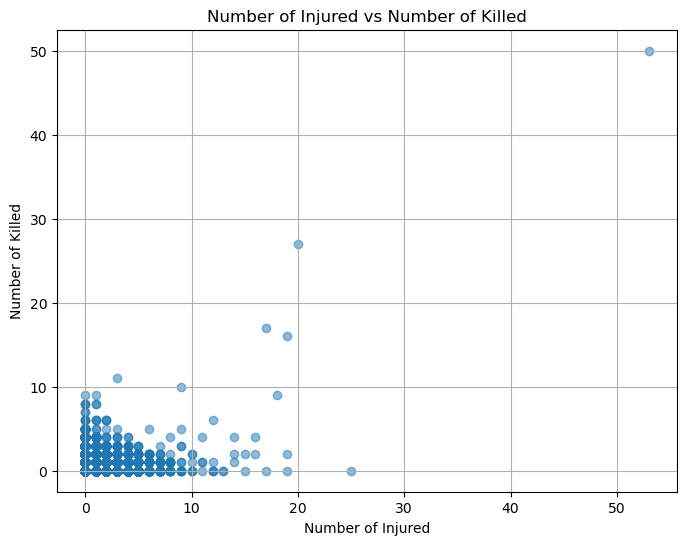

((191741, 1), (47936, 1), (191741,), (47936,))

In [84]:
# Visualize the relationship between 'n_injured' (independent) and 'n_killed' (dependent)
plt.figure(figsize=(8, 6))
plt.scatter(df['n_injured'], df['n_killed'], alpha=0.5)
plt.title('Number of Injured vs Number of Killed')
plt.xlabel('Number of Injured')
plt.ylabel('Number of Killed')
plt.grid(True)
plt.show()

# Hypothesis: "An increase in the number of injured individuals (n_injured) is positively correlated with the number of fatalities (n_killed)."

# Reshape variables into NumPy arrays for analysis
X = df['n_injured'].to_numpy().reshape(-1, 1)  # Independent variable
y = df['n_killed'].to_numpy()  # Dependent variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

There seems to be an upward sloping trent that correlates to an increase number of injured also increases the number of killed. Density near the origin indicates that most incidents do not involve high injuriy or deaths. The outliers should be investigated and I have a suspicion that those are mass shooting related incidents. 

<Figure size 2400x1200 with 0 Axes>

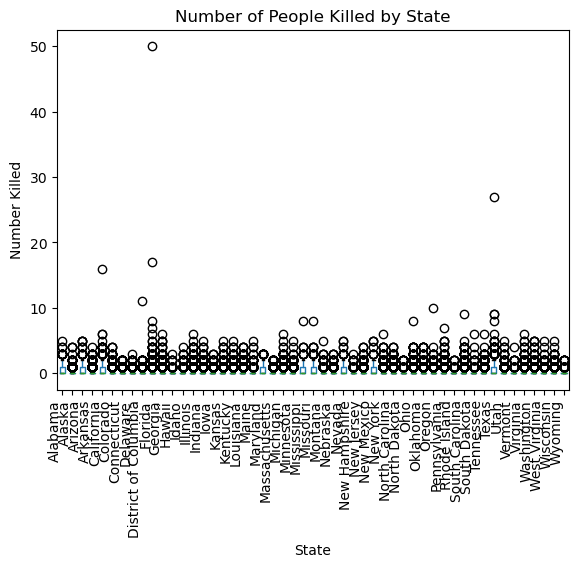

In [110]:
# Create a boxplot of 'n_killed' grouped by 'state'
plt.figure(figsize=(24, 12))  # Adjust the figure size for better readability
df.boxplot(column='n_killed', by='state', grid=False, showfliers=True)
plt.title('Number of People Killed by State')
plt.suptitle("")  # Suppress default title
plt.xlabel('State')
plt.ylabel('Number Killed')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better fit
plt.grid(False)
plt.show()

# 3. Regression Analysis

In [135]:
# Filter the dataset to include only relevant columns and drop missing values
filtered_data = df[['n_killed', 'participant_age']].dropna()

# Define independent (X) and dependent (y) variables
X = filtered_data['participant_age'].to_numpy().reshape(-1, 1)  # Independent variable
y = filtered_data['n_killed'].to_numpy()  # Dependent variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model= LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [136]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

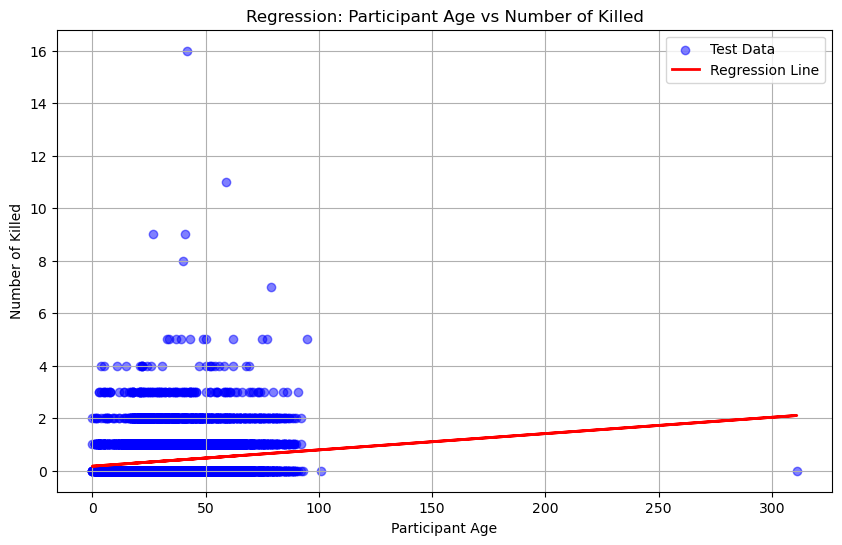

In [137]:
# Create a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Test Data', color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression: Participant Age vs Number of Killed')
plt.xlabel('Participant Age')
plt.ylabel('Number of Killed')
plt.legend()
plt.grid(True)
plt.show()


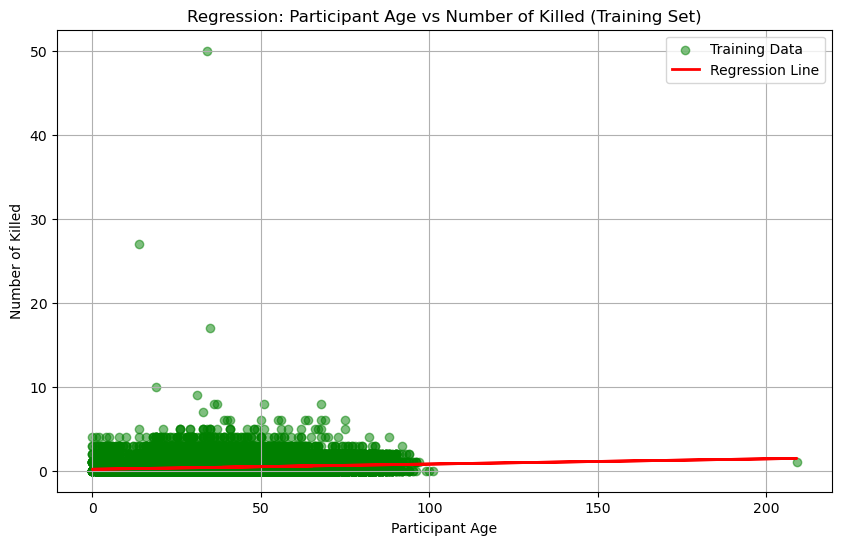

In [138]:
# Predict on the training set
y_train_pred = model.predict(X_train)

# Create a scatter plot with the regression line for the training set
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.5, label='Training Data', color='green')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression: Participant Age vs Number of Killed (Training Set)')
plt.xlabel('Participant Age')
plt.ylabel('Number of Killed')
plt.legend()
plt.grid(True)
plt.show()

The R2 score is slightly higher which would indicate a slight higher improvemetn in variance for n_killed and participant_age in the training data. Both test and training are very simliar with the training have an outlier of 250

In [140]:
#export new dataset
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'cleaned_merged_gv.csv'))